Task 1

In [5]:
import pandas as pd
import ast
import numpy as np

df = pd.read_csv('C:/university projects/DS Assignment 3/disease_features.csv')

print("Dataset columns:", df.columns.tolist())

def parse_str_object(s):
    """
    Attempt to parse a string that represents a Python list or dict.
    If successful and it's a list, join the list elements into a string.
    If it is a dict or any other type, return its string representation.
    If parsing fails, return the original string.
    """
    try:
        parsed = ast.literal_eval(s)
        if isinstance(parsed, list):
            return " ".join([str(item).strip() for item in parsed])
        elif isinstance(parsed, dict):
            return " ".join([f"{key} {value}" for key, value in parsed.items()])
        else:
            return str(parsed)
    except Exception as e:
        return s
for col in ['Risk Factors', 'Symptoms', 'Signs', 'Subtypes']:
    df[col + '_processed'] = df[col].apply(parse_str_object)

df[['Disease', 'Risk Factors_processed', 'Symptoms_processed', 'Signs_processed', 'Subtypes_processed']].head()



Dataset columns: ['Disease', 'Risk Factors', 'Symptoms', 'Signs', 'Subtypes']


,Disease,Risk Factors_processed,Symptoms_processed,Signs_processed,Subtypes_processed
0,Acute Coronary Syndrome,Hyperlipidemia hypertension smoking diabetes i...,Chest pain sweating nausea vomiting palpitatio...,,UA hs-cTn levels are normal，Normal ECG NSTEMI ...
1,Adrenal Insufficiency,Autoimmune diseases Genetic predisposition Inf...,Fatigue Muscle weakness Weight loss Gastrointe...,Hyperpigmentation (especially in creases of sk...,Primary Adrenal Insufficiency 1. Often there a...
2,Alzheimer,Age genetic factors gender cardiovascular heal...,"Cognitive decline, including memory loss and d...",,Alzheimer 1. Clinical Assessment\n Detailed...
3,Aortic Dissection,Hypertension Atherosclerosis Family history Hi...,Intense chest or upper back pain Sudden severe...,,"Type A Aortic Dissection CT, MRI, TEE checking..."
4,Asthma,Allergies family history of asthma or allergie...,Recurrent episodes of wheezing breathlessness ...,Observable signs during a physical examination...,Severe Asthma doesn't respond well to conventi...


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_rf = TfidfVectorizer()
tfidf_symp = TfidfVectorizer()
tfidf_signs = TfidfVectorizer()
X_rf = tfidf_rf.fit_transform(df['Risk Factors_processed'])
X_symp = tfidf_symp.fit_transform(df['Symptoms_processed'])
X_signs = tfidf_signs.fit_transform(df['Signs_processed'])
print("Unique features (Risk Factors):", len(tfidf_rf.get_feature_names_out()))
print("Unique features (Symptoms):", len(tfidf_symp.get_feature_names_out()))
print("Unique features (Signs):", len(tfidf_signs.get_feature_names_out()))


Unique features (Risk Factors): 360
Unique features (Symptoms): 424
Unique features (Signs): 236


In [9]:
from scipy.sparse import hstack

X_tfidf = hstack([X_rf, X_symp, X_signs])
print("Combined TF-IDF matrix shape:", X_tfidf.shape)


Combined TF-IDF matrix shape: (25, 1020)


In [13]:
df_onehot = pd.read_csv('C:/university projects/DS Assignment 3/encoded_output2.csv')
print("One-hot encoded matrix shape:", df_onehot.shape)
num_elements_tfidf = X_tfidf.shape[0] * X_tfidf.shape[1]
nonzero_tfidf = X_tfidf.count_nonzero()
sparsity_tfidf = (1 - nonzero_tfidf / num_elements_tfidf) * 100
print("TF-IDF matrix sparsity: {:.2f}%".format(sparsity_tfidf))

onehot_array = df_onehot.values
num_elements_onehot = onehot_array.size
nonzero_onehot = np.count_nonzero(onehot_array)
sparsity_onehot = (1 - nonzero_onehot / num_elements_onehot) * 100
print("One-hot encoded matrix sparsity: {:.2f}%".format(sparsity_onehot))


One-hot encoded matrix shape: (25, 497)
TF-IDF matrix sparsity: 92.96%
One-hot encoded matrix sparsity: 95.15%


In [17]:
import pandas as pd

feature_names = [f'feature_{i}' for i in range(X_tfidf.shape[1])]
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)
df_tfidf.insert(0, 'Disease', df['Disease'].values)

# Save the DataFrame to CSV
df_tfidf.to_csv('outputtfidf.csv', index=False)


Task 2

In [23]:
import pandas as pd
onehot_df = pd.read_csv('C:/university projects/DS Assignment 3/encoded_output2.csv')

X_onehot = onehot_df.drop(columns=['Disease']) if 'Disease' in onehot_df.columns else onehot_df


In [27]:
from sklearn.decomposition import PCA, TruncatedSVD

pca_tfidf = PCA(n_components=2)
pca_onehot = PCA(n_components=2)

svd_tfidf = TruncatedSVD(n_components=2)
svd_onehot = TruncatedSVD(n_components=2)

X_pca_tfidf = pca_tfidf.fit_transform(X_tfidf.toarray())
X_pca_onehot = pca_onehot.fit_transform(X_onehot)

X_svd_tfidf = svd_tfidf.fit_transform(X_tfidf)
X_svd_onehot = svd_onehot.fit_transform(X_onehot)


In [29]:
print("PCA (TF-IDF) explained variance:", pca_tfidf.explained_variance_ratio_)
print("PCA (One-hot) explained variance:", pca_onehot.explained_variance_ratio_)


PCA (TF-IDF) explained variance: [0.06583365 0.05889337]
PCA (One-hot) explained variance: [0.10538866 0.09170854]


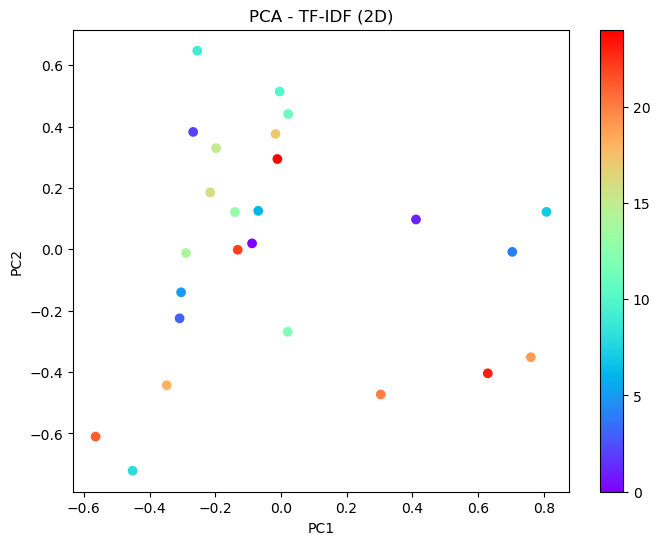

In [31]:
import matplotlib.pyplot as plt

categories = df['Disease'].apply(lambda d: d.split()[0]) 
plt.figure(figsize=(8,6))
plt.scatter(X_pca_tfidf[:, 0], X_pca_tfidf[:, 1], c=pd.factorize(categories)[0], cmap='rainbow')
plt.title('PCA - TF-IDF (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()


Task 3 

It is for how many samples in categories

In [61]:
from collections import Counter
print(Counter(y))


Counter({0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 7: 1, 6: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1})


In [77]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

k_values = [3, 5, 7]
distance_metrics = ['euclidean', 'manhattan', 'cosine']

cv = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro', zero_division=0),
    'recall': make_scorer(recall_score, average='macro', zero_division=0),
    'f1': make_scorer(f1_score, average='macro', zero_division=0)
}


The data set is too short so the KNN model can not be trained on it so i redifined the categories so the sample size will increase

In [79]:

disease_to_category = {
    'Acute Coronary Syndrome': 'Cardiovascular',
    'Aortic Dissection': 'Cardiovascular',
    'Stroke': 'Cardiovascular',
    'Pulmonary Embolism': 'Cardiovascular',
    'Adrenal Insufficiency': 'Endocrine',
    'Thyroid Disease': 'Endocrine',
    'Pituitary Disease': 'Endocrine',
    'Alzheimer': 'Neurological',
    'Asthma': 'Respiratory',
    'Pneumonia': 'Respiratory',
    'Tuberculosis': 'Respiratory',
    'Peptic Ulcer Disease': 'Gastrointestinal',
    'Upper Gastrointestinal Bleeding': 'Gastrointestinal'
}

df['Category'] = df['Disease'].apply(lambda x: disease_to_category.get(x, 'Other'))

print("Category Distribution:\n", df['Category'].value_counts())

from sklearn.preprocessing import LabelEncoder
le_cat = LabelEncoder()
y_grouped = le_cat.fit_transform(df['Category'])
print("Encoded Category Labels:\n", y_grouped)


Category Distribution:
 Category
Other               12
Cardiovascular       4
Endocrine            3
Respiratory          3
Gastrointestinal     2
Neurological         1
Name: count, dtype: int64
Encoded Category Labels:
 [0 1 3 0 5 4 4 4 4 4 4 4 4 4 4 4 4 2 1 5 0 0 1 5 2]


In [81]:
def run_knn_models(X, y, k_values, metrics, cv, scoring):
    results = []
    for metric in metrics:
        for k in k_values:
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
            
            cv_results = cross_validate(knn, X, y, cv=cv, scoring=scoring)
            result = {
                'k': k,
                'metric': metric,
                'accuracy': np.mean(cv_results['test_accuracy']),
                'precision': np.mean(cv_results['test_precision']),
                'recall': np.mean(cv_results['test_recall']),
                'f1': np.mean(cv_results['test_f1'])
            }
            results.append(result)
    return pd.DataFrame(results)

def run_logistic_regression(X, y, cv, scoring):
    logreg = LogisticRegression(max_iter=1000)
    cv_results = cross_validate(logreg, X, y, cv=cv, scoring=scoring)
    return {
        'accuracy': np.mean(cv_results['test_accuracy']),
        'precision': np.mean(cv_results['test_precision']),
        'recall': np.mean(cv_results['test_recall']),
        'f1': np.mean(cv_results['test_f1'])
    }


In [83]:

X_tfidf_dense = X_tfidf.toarray()

if isinstance(X_onehot, pd.DataFrame):
    X_onehot_array = X_onehot.values
else:
    X_onehot_array = X_onehot

knn_results_tfidf = run_knn_models(X_tfidf_dense, y_grouped, k_values, distance_metrics, cv, scoring)
print("KNN Results on TF-IDF Features (Grouped Categories):")
print(knn_results_tfidf)

knn_results_onehot = run_knn_models(X_onehot_array, y_grouped, k_values, distance_metrics, cv, scoring)
print("\nKNN Results on One-Hot Features (Grouped Categories):")
print(knn_results_onehot)

logreg_results_tfidf = run_logistic_regression(X_tfidf_dense, y_grouped, cv, scoring)
print("\nLogistic Regression Results on TF-IDF Features (Grouped Categories):")
print(logreg_results_tfidf)

# Run Logistic Regression on One-Hot features
logreg_results_onehot = run_logistic_regression(X_onehot_array, y_grouped, cv, scoring)
print("\nLogistic Regression Results on One-Hot Features (Grouped Categories):")
print(logreg_results_onehot)


KNN Results on TF-IDF Features (Grouped Categories):
   k     metric  accuracy  precision    recall        f1
0  3  euclidean      0.32   0.172778  0.155278  0.149444
1  5  euclidean      0.40   0.140833  0.183333  0.154762
2  7  euclidean      0.44   0.170000  0.266667  0.203571
3  3  manhattan      0.44   0.214444  0.275000  0.225000
4  5  manhattan      0.44   0.170000  0.266667  0.203571
5  7  manhattan      0.48   0.200000  0.316667  0.242460
6  3     cosine      0.24   0.225000  0.188889  0.200000
7  5     cosine      0.48   0.345000  0.333333  0.310714
8  7     cosine      0.36   0.182222  0.214444  0.175238

KNN Results on One-Hot Features (Grouped Categories):
   k     metric  accuracy  precision    recall        f1
0  3  euclidean      0.48   0.200000  0.316667  0.242460
1  5  euclidean      0.48   0.200000  0.316667  0.242460
2  7  euclidean      0.48   0.200000  0.316667  0.242460
3  3  manhattan      0.48   0.200000  0.316667  0.242460
4  5  manhattan      0.48   0.200000 

In [85]:
print("SUMMARY OF MODEL PERFORMANCE")

print("\nKNN (TF-IDF Features):")
print(knn_results_tfidf)

print("\nKNN (One-Hot Features):")
print(knn_results_onehot)

print("\nLogistic Regression (TF-IDF Features):")
print(logreg_results_tfidf)

print("\nLogistic Regression (One-Hot Features):")
print(logreg_results_onehot)


==== SUMMARY OF MODEL PERFORMANCE ====

KNN (TF-IDF Features):
   k     metric  accuracy  precision    recall        f1
0  3  euclidean      0.32   0.172778  0.155278  0.149444
1  5  euclidean      0.40   0.140833  0.183333  0.154762
2  7  euclidean      0.44   0.170000  0.266667  0.203571
3  3  manhattan      0.44   0.214444  0.275000  0.225000
4  5  manhattan      0.44   0.170000  0.266667  0.203571
5  7  manhattan      0.48   0.200000  0.316667  0.242460
6  3     cosine      0.24   0.225000  0.188889  0.200000
7  5     cosine      0.48   0.345000  0.333333  0.310714
8  7     cosine      0.36   0.182222  0.214444  0.175238

KNN (One-Hot Features):
   k     metric  accuracy  precision    recall        f1
0  3  euclidean      0.48   0.200000  0.316667  0.242460
1  5  euclidean      0.48   0.200000  0.316667  0.242460
2  7  euclidean      0.48   0.200000  0.316667  0.242460
3  3  manhattan      0.48   0.200000  0.316667  0.242460
4  5  manhattan      0.48   0.200000  0.316667  0.242460
